In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

#import os
#os.chdir("C:\\Users\\Aram\\Documents\\Work\\AUA\\Time Series Forecasting\\Slides\\Lecture 6\\")

## Data description 
Quarterly earnings per share for the U.S. company Johnson &
Johnson, furnished by Professor Paul Griffin (personal communication) of the
Graduate School of Management, University of California, Davis. There are 84
quarters (21 years) measured from the first quarter of 1960 to the last quarter of
1980.

In [17]:
jonson = pd.read_csv(r'jj.csv') # Jonson & Jonson
jonson.head()

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61


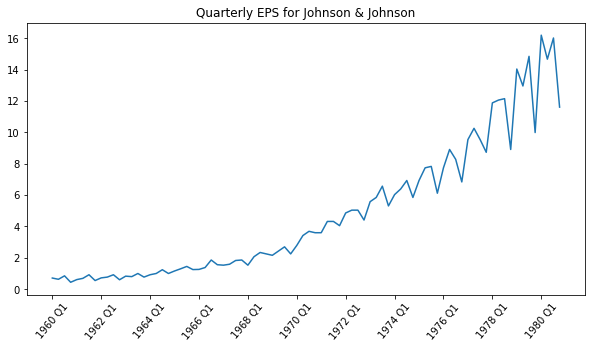

In [18]:
plt.figure(figsize=[10, 5]); # Figure dimentions
plt.plot(jonson['index'],jonson['value'])
plt.title("Quarterly EPS for Johnson & Johnson")
plt.xticks(jonson['index'], rotation=50)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.show()

In [19]:
# The log difference to make data stationary
jonson['value'] = np.log(jonson['value'])           # log of values
jonson['value'] = jonson['value'].diff()            # Take first difference
jonson = jonson.drop(jonson.index[0])               # Remove first observation
jonson.head()

,index,value
1,1960 Q2,-0.119545
2,1960 Q3,0.299517
3,1960 Q4,-0.658462
4,1961 Q1,0.326684
5,1961 Q2,0.123233


In [ ]:
#jonson.head(10)
#jonson.tail(10)

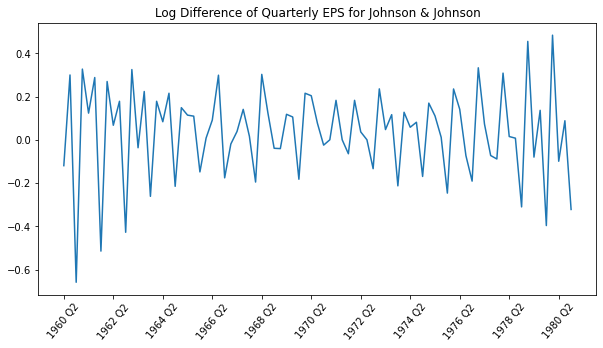

In [20]:
plt.figure(figsize=[10, 5]); # Figure dimentions
plt.plot(jonson['index'],jonson['value'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.xticks(jonson['index'], rotation=50)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.show()

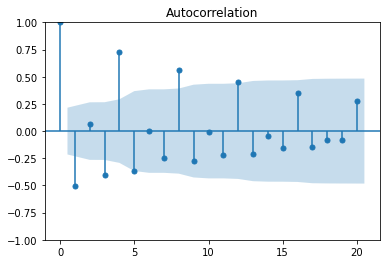

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(jonson['value'], lags=20)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


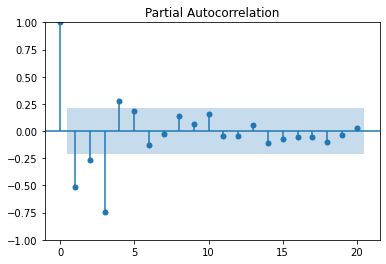

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(jonson['value'], lags=20)
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(jonson['value'], order=(3,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   83
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  77.908
Date:                Mon, 20 Mar 2023   AIC                           -145.815
Time:                        09:13:08   BIC                           -133.721
Sample:                             0   HQIC                          -140.957
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.003     12.743      0.000       0.033       0.045
ar.L1         -0.9194      0.054    -17.115      0.000      -1.025      -0.814
ar.L2         -0.8470      0.081    -10.427      0.0

## AIC & BIC

$$
\mathrm{AIC}=\frac{-2 \ln (\text { maximized likelihood })+2 k}{n} \approx \ln \left(\hat{\sigma}_{k}^{2}\right)+k \frac{2}{n}+\text { constant }
$$


$$
\mathrm{BIC}= -2 \ln (\text { maximized likelihood })+ ln({n})k \approx\ln \left(\hat{\sigma}_{k}^{2}\right)+k \frac{\ln (n)}{n}
$$

- Where, $\sigma_{k}^{2}$ is variance of innovations (residuals), $\hat{\sigma}_{k}^{2}$ is the maximum likelihood estimate of $\sigma_{k}^{2}$, and $k=p+q+2$ is the number of estimated parameters, including a constant term. 


- The first term essentially corresponds to $-2 / n$ times the log of the maximized likelihood, while the second term is a "penalty factor" for inclusion of additional parameters in the model. 


- Models that yield a minimum value for the criterion are to be preferred. 


- Hence, since the BIC criterion imposes a greater penalty for the number of estimated model parameters than does AIC, use of minimum BIC for model selection would always result in a chosen model whose number of parameters is no greater than that chosen under AIC.


- AIC is better for small samples, BIC for large samples.


#### Sources:
Time Series Analysis and Its Applications, pp. 51-53; Time Series Analysis Forecasting and Control, p. 193

#### Documentation:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.html

In [24]:
import math

In [25]:
-2*77.908+10   # AIC

-145.816

In [26]:
-2*77.908+math.log(83)*5   # BIC

-133.72179696101702

In [27]:
mod_2 = ARIMA(jonson['value'], order=(4,0,0))
result_2 = mod_2.fit()
print(result_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   83
Model:                 ARIMA(4, 0, 0)   Log Likelihood                  80.624
Date:                Mon, 20 Mar 2023   AIC                           -149.248
Time:                        09:13:17   BIC                           -134.735
Sample:                             0   HQIC                          -143.417
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.004      9.575      0.000       0.031       0.046
ar.L1         -0.6830      0.113     -6.040      0.000      -0.905      -0.461
ar.L2         -0.6099      0.117     -5.206      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**We choose AR(4), since AIC and BIC are smaller for that model.**


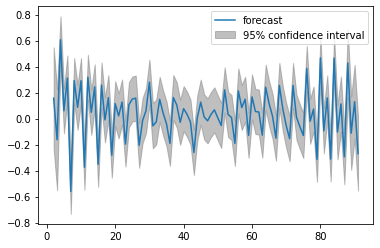

In [35]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(result_2, start = 1, end = 90, plot_insample=False) # forecast for two years (8 quarters)
#a.set_size_inches(20,10)
plt.show()

In [36]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIM